<a href="https://colab.research.google.com/github/hvhq/appcomponents/blob/main/ImageResizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

Ảnh đầu vào có tên nature.jpg đặt trong cùng thư mục.

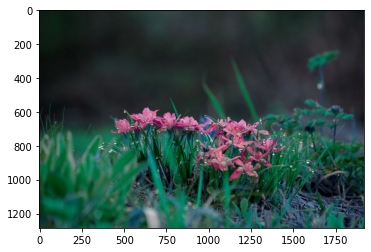

In [2]:
img = cv.imread("nature.jpg")
plt.imshow(img)
plt.show()

In [ ]:
#print(img.shape)
#I=img
#Ma tran energy
#D_x=I[:-1, 1:] - I[:-1, :-1]
#D_y=I[1:, :-1] - I[:-1, :-1]
#D=np.sqrt(D_x**2+D_y**2)

#print(D)

In [3]:
def cellCost(pixel):
  return np.sqrt(sum(pixel**2))

In [4]:
def findMinPath(energy):
  mincost = np.zeros((energy.shape[0], energy.shape[1]))
  trace = np.zeros((energy.shape[0], energy.shape[1]))
  for j in range(energy.shape[1]):
    mincost[0, j] = cellCost(energy[0, j])

  choose=0
  for i in range(1, energy.shape[0]):
    for j in range(energy.shape[1]):
      choose=j-1
      if choose < 0:
        choose = 0
      #if i==2:
      #  print(mincost[i-1,j])
      if mincost[i-1, j] < mincost[i-1, choose]:
        choose=j
      if j+1 < energy.shape[1] and mincost[i-1, j+1] < mincost[i-1, choose]:
        choose=j+1
      mincost[i,j]=mincost[i-1,choose] + cellCost(energy[i, j])
      trace[i,j] = choose
  min = 0
  i = energy.shape[0]-1
  #best end
  for j in range(1, energy.shape[1]):
    if mincost[i, min] > mincost[i, j]:
      min = j
  
  return trace, min


In [5]:
def delOneSeam(img, energy, trace, min=0): 
  #del seam
  img2 = np.zeros((img.shape[0], img.shape[1]-1, img.shape[2]))
  energy2=np.zeros((img.shape[0], img.shape[1]-1, img.shape[2]))
  for i in range(energy.shape[0]-1, -1, -1):
    threshold = min
    #print("cut at (",i,",",min,")")
    for j in range(energy.shape[1]-1):
      img2[i, j] = img[i, j + (j>=min)]
      if j==min:
        if j-1>=0:
          energy[i, j-1] = img[i, j]**2
          if i<energy.shape[0]-1:
            energy[i, j-1]+=img[i+1, j-1]**2
          energy[i, j-1] = np.sqrt(energy[i, j-1])
        if i-1>=0:
          energy[i-1, j]=img[i,j]**2
          if j<energy.shape[1]-1:
            energy[i-1, j]+=img[i-1,j+1]**2
          energy[i-1, j] = np.sqrt(energy[i-1, j])
        energy2[i,j]=energy[i,j]
      else:
        energy2[i,j]=img[i, j + (j>=min)]
    min = int(trace[i, min])

  return img2, energy2


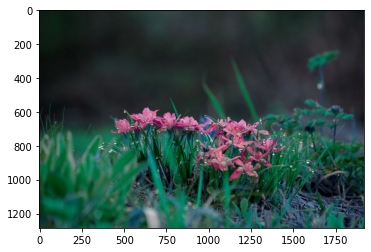

(1285, 1920, 3)
(1285, 1920, 3)
min 213
(1285, 1920)
done 1 cut
(1285, 1919, 3)
(1285, 1919, 3)
min 213
(1285, 1919)
done 2 cut
(1285, 1918, 3)
(1285, 1918, 3)
min 213
(1285, 1918)
done 3 cut
(1285, 1917, 3)
(1285, 1917, 3)
min 213
(1285, 1917)
done 4 cut
(1285, 1916, 3)
(1285, 1916, 3)
min 8
(1285, 1916)
done 5 cut
(1285, 1915, 3)
(1285, 1915, 3)
min 8
(1285, 1915)
done 6 cut
(1285, 1914, 3)
(1285, 1914, 3)
min 8
(1285, 1914)
done 7 cut
(1285, 1913, 3)
(1285, 1913, 3)
min 8
(1285, 1913)
done 8 cut
(1285, 1912, 3)
(1285, 1912, 3)
min 8
(1285, 1912)
done 9 cut
(1285, 1911, 3)
(1285, 1911, 3)
min 8
(1285, 1911)
done 10 cut


In [6]:
img = cv.imread("nature.jpg")
plt.imshow(img)
plt.show()

imgtmp=img
imgtmp = np.append(imgtmp, np.zeros((imgtmp.shape[0],1, 3)), 1)
imgtmp = np.append(imgtmp, np.zeros((1, imgtmp.shape[1], 3)), 0)

D_x=imgtmp[:-1, 1:] - imgtmp[:-1, :-1]
D_y=imgtmp[1:, :-1] - imgtmp[:-1, :-1]
energy=np.sqrt(D_x**2+D_y**2)

imgtmp=img
cutsize=10
for i in range(cutsize):
  print(imgtmp.shape)
  print(energy.shape)
  trace, min = findMinPath(energy)
  print("min", min)
  print(trace.shape)
  imgtmp, energy = delOneSeam(imgtmp, energy, trace, min)
  print("done",i+1,"cut")


Ảnh imgtmp là ảnh đầu ra

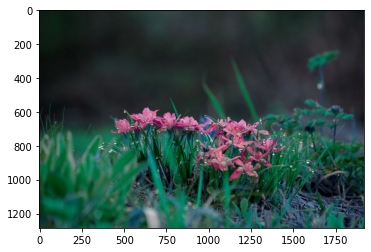

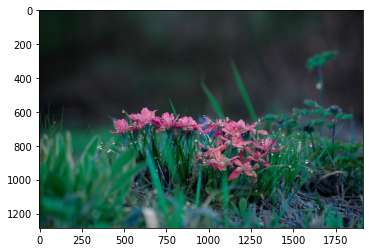

In [7]:
plt.imshow(img)
plt.show()
plt.imshow(imgtmp.astype(int))
plt.show()